In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

#model evaluation
from sklearn.metrics import mean_squared_error, r2_score 

import seaborn as sns

In [253]:
df = pd.read_csv('FloridaBikeRentals.csv', encoding="ISO-8859-1")
df.sample(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
4403,02/06/2018,1094,11,27.3,35,2.3,1537,10.4,2.98,0.0,0.0,Summer,No Holiday,Yes
7271,29/09/2018,1229,23,18.6,59,0.7,2000,10.4,0.00,0.0,0.0,Autumn,No Holiday,Yes
6872,13/09/2018,2329,8,20.9,68,1.3,2000,14.7,0.18,0.0,0.0,Autumn,No Holiday,Yes
1150,17/01/2018,313,22,2.8,74,0.5,309,-1.3,0.00,0.0,0.0,Winter,No Holiday,Yes
4349,31/05/2018,265,5,14.4,82,1.2,708,11.3,0.00,0.0,0.0,Spring,No Holiday,Yes
2264,05/03/2018,184,8,3.6,88,2.3,2000,1.7,0.03,0.0,0.0,Spring,No Holiday,Yes
7380,04/10/2018,0,12,23.2,38,1.7,1990,8.0,2.44,0.0,0.0,Autumn,No Holiday,No
4477,05/06/2018,1058,13,28.6,34,2.0,1274,11.1,2.82,0.0,0.0,Summer,No Holiday,Yes
1523,02/02/2018,234,11,-1.4,37,1.0,1317,-14.2,0.91,0.0,0.0,Winter,No Holiday,Yes
5548,20/07/2018,267,4,25.1,83,0.0,1253,22.0,0.00,0.0,0.0,Summer,No Holiday,Yes


In [254]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [256]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [257]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [258]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.weekday
df['Day'] = df['Date'].dt.day
df['Week'] = df['Date'].dt.weekday
df['Weekday_Name'] = df['Date'].dt.day_name()

In [259]:
df[df['Week']==0].head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Week,Day,Weekday_Name
72,2017-12-04,285,0,4.2,88,0.6,216,2.3,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,0,4,Monday
73,2017-12-04,186,1,4.3,87,0.5,221,2.3,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,0,4,Monday
74,2017-12-04,112,2,4.4,87,1.8,207,2.4,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,0,4,Monday
75,2017-12-04,65,3,3.6,85,2.3,206,1.3,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,0,4,Monday
76,2017-12-04,41,4,2.8,89,1.5,130,1.1,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,0,4,Monday


In [260]:
def is_weekend(weekno):
    return int(weekno>=5)
df['Weekend'] = df['Week'].apply(is_weekend)

In [261]:
df.sample(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Week,Day,Weekday_Name,Weekend
5851,2018-08-01,1553,19,36.1,56,3.7,1837,25.9,0.47,0.0,0.0,Summer,No Holiday,Yes,2018,8,2,1,Wednesday,0
2812,2018-03-28,104,4,10.6,77,0.9,422,6.7,0.00,0.0,0.0,Spring,No Holiday,Yes,2018,3,2,28,Wednesday,0
6588,2018-09-01,1086,12,28.9,46,1.6,1966,16.1,2.96,0.0,0.0,Autumn,No Holiday,Yes,2018,9,5,1,Saturday,1
2802,2018-03-27,1521,18,16.8,60,3.1,580,8.9,0.46,0.0,0.0,Spring,No Holiday,Yes,2018,3,1,27,Tuesday,0
3868,2018-05-11,154,4,11.9,85,0.7,315,9.4,0.00,0.0,0.0,Spring,No Holiday,Yes,2018,5,4,11,Friday,0
8586,2018-11-23,1548,18,3.9,23,1.0,2000,-15.4,0.00,0.0,0.0,Autumn,No Holiday,Yes,2018,11,4,23,Friday,0
1399,2018-01-28,42,7,-8.0,39,1.9,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes,2018,1,6,28,Sunday,1
5226,2018-07-06,3196,18,25.9,52,2.1,2000,15.2,0.57,0.0,0.0,Summer,No Holiday,Yes,2018,7,4,6,Friday,0
6505,2018-08-29,334,1,22.8,97,0.5,2000,22.2,0.00,0.5,0.0,Summer,No Holiday,Yes,2018,8,2,29,Wednesday,0
6629,2018-09-03,264,5,23.9,70,1.5,2000,18.0,0.00,0.0,0.0,Autumn,No Holiday,Yes,2018,9,0,3,Monday,0


In [262]:
corr_matrix = df.corr(numeric_only=True)


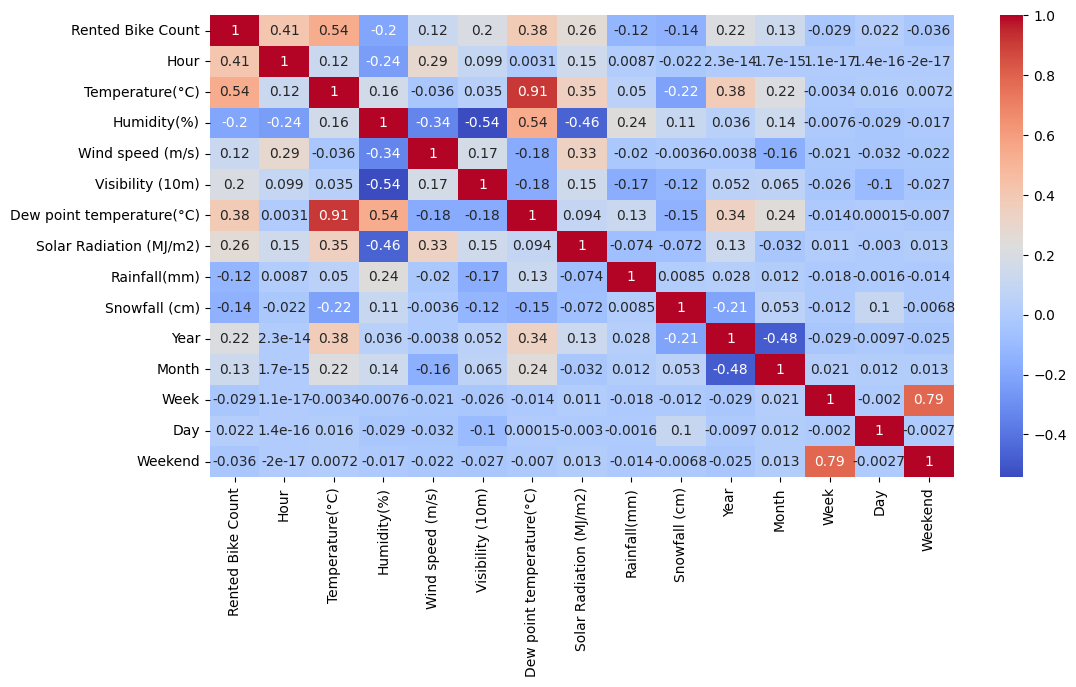

In [263]:
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

**Observations:**
- Dew point temperature and Temperature have a very high positive correlation
- Weekend and Week also has a high correlation
- Humidity has a high negative correlation with Visibility and Solar Radiation
- Year and Month have a high negative correlation
- Dew Point Temp and Humidity also has a high correlation
- Temp and Rented Bike Count also has a high correlation

<Axes: xlabel='Rented Bike Count', ylabel='Count'>

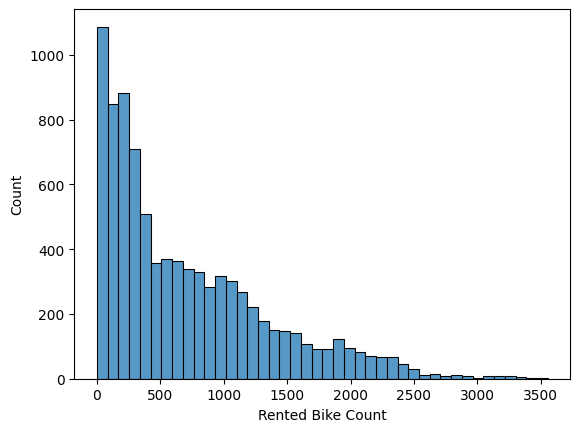

In [264]:
sns.histplot(data = df, x='Rented Bike Count')

In [265]:
df.sample(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Week,Day,Weekday_Name,Weekend
5104,2018-07-01,41,16,22.2,97,1.1,1745,21.6,0.25,1.0,0.0,Summer,No Holiday,Yes,2018,7,6,1,Sunday,1
6121,2018-08-13,231,1,28.2,88,0.2,929,26.0,0.00,1.0,0.0,Summer,No Holiday,Yes,2018,8,0,13,Monday,0
252,2017-12-11,247,12,-5.2,33,4.6,1973,-19.0,1.26,0.0,0.0,Winter,No Holiday,Yes,2017,12,0,11,Monday,0
4715,2018-06-15,1118,11,22.9,57,1.4,1918,13.9,2.24,0.0,0.0,Summer,No Holiday,Yes,2018,6,4,15,Friday,0
6446,2018-08-26,417,14,25.8,69,3.6,1309,19.6,0.56,0.1,0.0,Summer,No Holiday,Yes,2018,8,6,26,Sunday,1
3516,2018-04-26,1197,12,19.6,36,2.2,962,4.1,2.55,0.0,0.0,Spring,No Holiday,Yes,2018,4,3,26,Thursday,0
4335,2018-05-30,1280,15,24.3,52,3.0,1447,13.8,2.55,0.0,0.0,Spring,No Holiday,Yes,2018,5,2,30,Wednesday,0
4861,2018-06-21,1147,13,27.3,33,3.4,1921,9.6,3.42,0.0,0.0,Summer,No Holiday,Yes,2018,6,3,21,Thursday,0
3760,2018-05-06,1482,16,19.5,66,1.7,2000,12.9,1.71,0.0,0.0,Spring,No Holiday,Yes,2018,5,6,6,Sunday,1
6712,2018-09-06,1292,16,26.9,55,3.9,1909,17.0,0.54,0.0,0.0,Autumn,No Holiday,Yes,2018,9,3,6,Thursday,0


<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

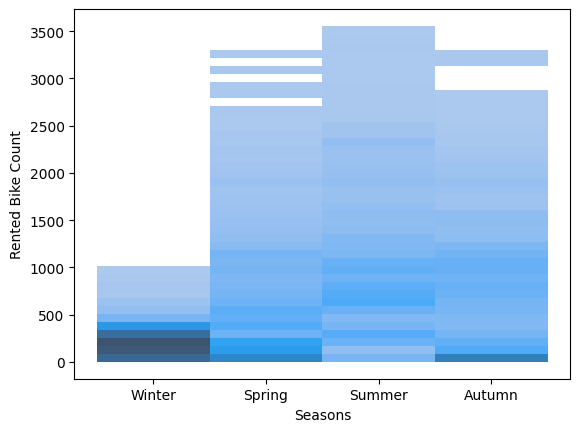

In [266]:
sns.histplot(data = df, y='Rented Bike Count', x='Seasons')

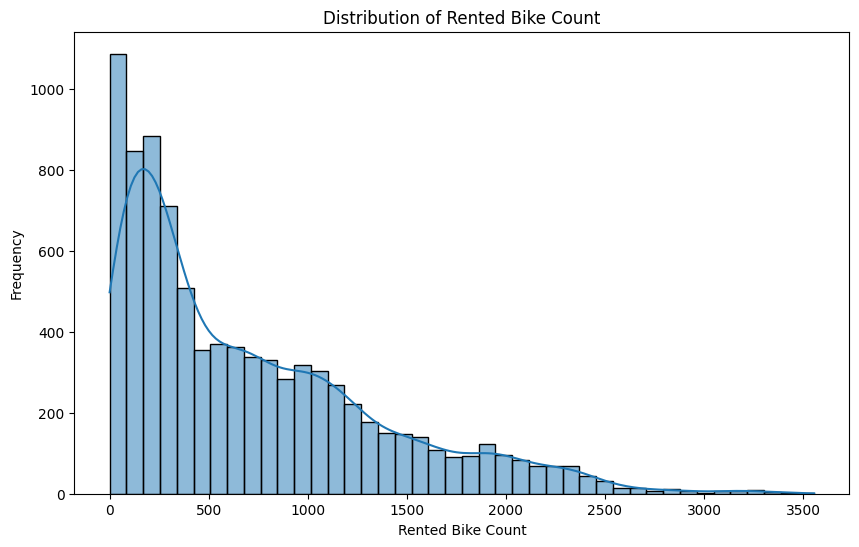

In [267]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rented Bike Count'], kde=True)

# Customize the plot
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [269]:
numeric_features = df.select_dtypes(include='number').columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Year',
       'Month', 'Week', 'Day', 'Weekend'],
      dtype='object')

In [270]:
len(numeric_features)

15

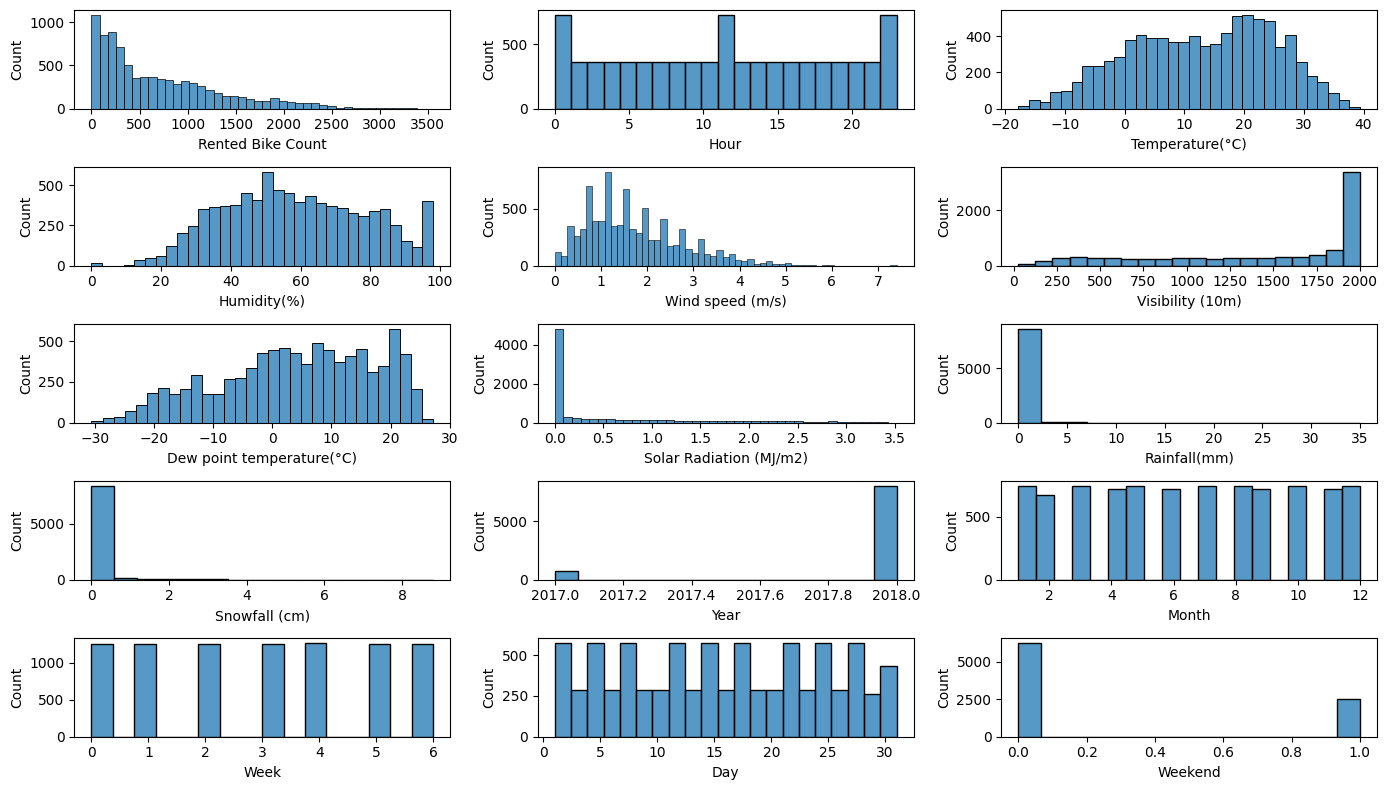

In [271]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(14,8))
axes = axes.flatten()

for idx, col in enumerate(numeric_features):
    sns.histplot(df,x=col,ax=axes[idx])

fig.tight_layout()

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [273]:
categorical_features = ['Hour','Seasons', 'Holiday', 'Functioning Day','Month','Week','Day','Weekend']

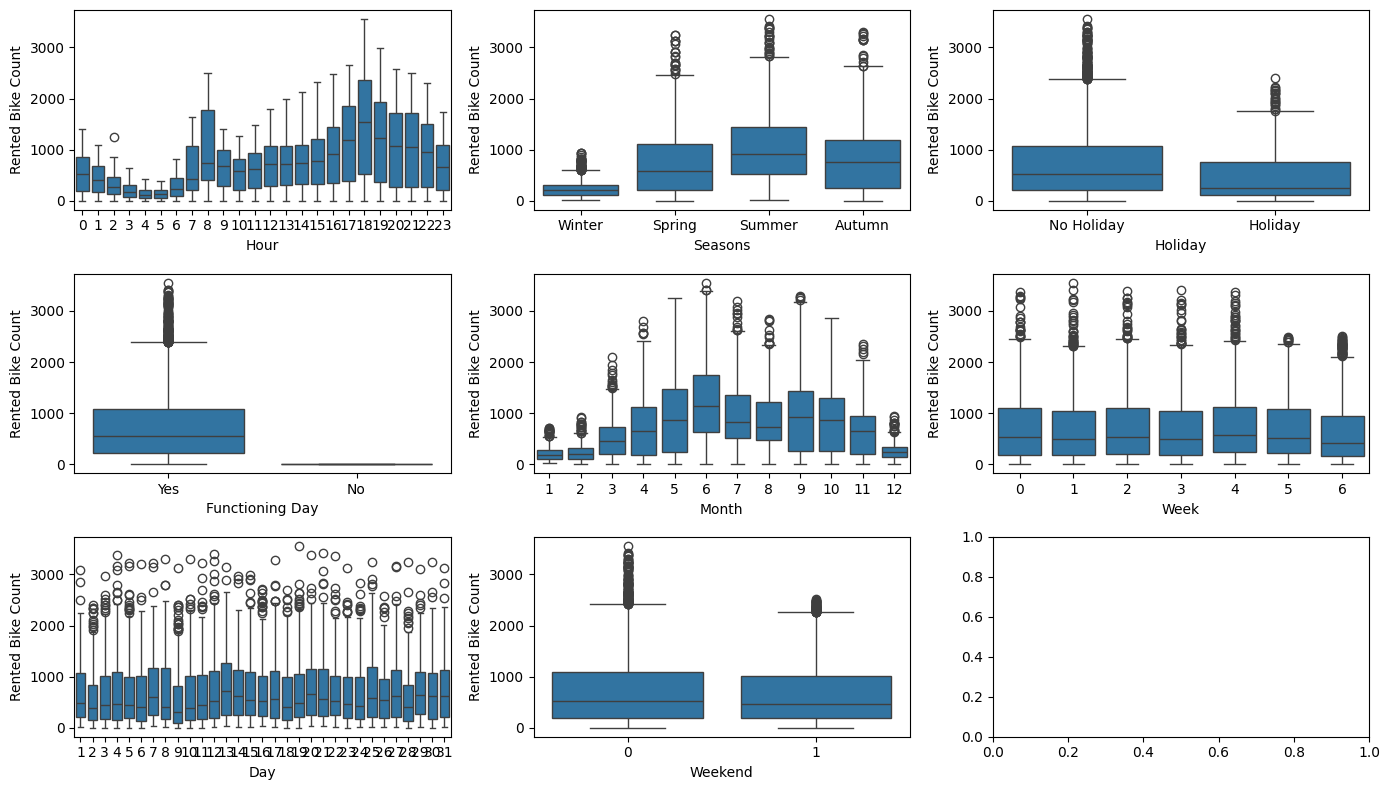

In [274]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,8))
axes = axes.flatten()

for idx, col in enumerate(categorical_features):
    sns.boxplot(df,x=col, y='Rented Bike Count',ax=axes[idx])

fig.tight_layout()

In [275]:
time_cat_features = ['Hour', 'Holiday', 'Weekend','Seasons']

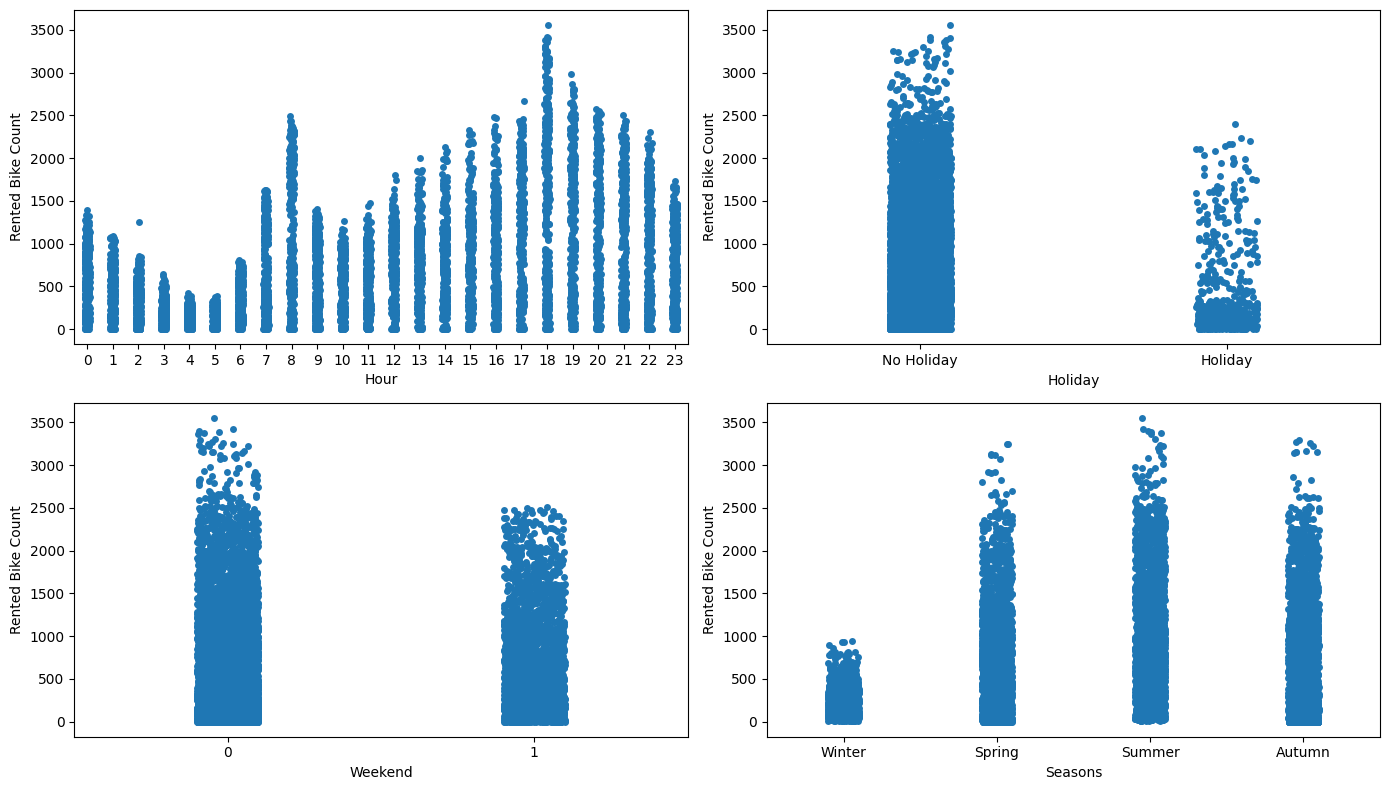

In [276]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,8))
axes = axes.flatten()

for idx, col in enumerate(time_cat_features):
    sns.stripplot(df,x=col, y='Rented Bike Count',ax=axes[idx])

fig.tight_layout()

**Observations: for strip plot**
- Winter has low rental counts compared to the other seasons
- There is higher rental in weekdays
- HOur-wise, there is highest rental at 6pm in the evening and another peak at 8am in the morning (although lower than the evening one)
- No Holiday sees higher rental

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

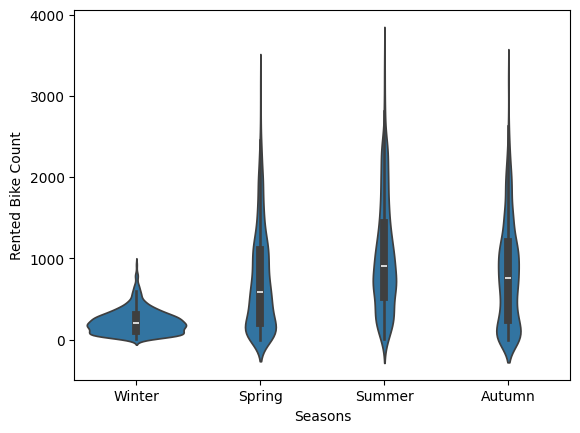

In [277]:
sns.violinplot(df, x='Seasons', y='Rented Bike Count')

<Axes: xlabel='Rainfall(mm)', ylabel='Rented Bike Count'>

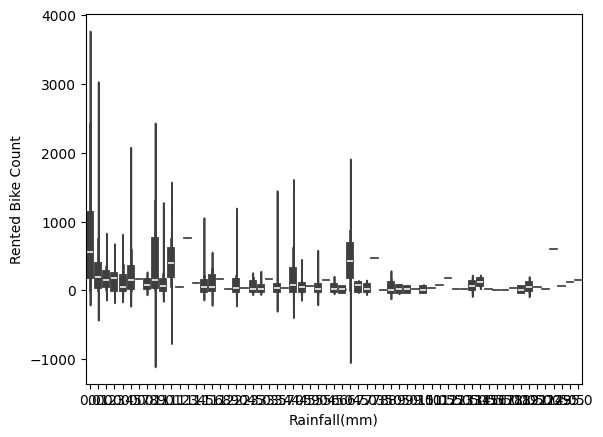

In [278]:
sns.violinplot(df, x='Rainfall(mm)', y='Rented Bike Count')

In [279]:
categorical_features

['Hour',
 'Seasons',
 'Holiday',
 'Functioning Day',
 'Month',
 'Week',
 'Day',
 'Weekend']

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [281]:
df_org = df.copy()

In [282]:
df = pd.get_dummies(df, columns=['Seasons'], dtype=int)
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Year,Month,Week,Day,Weekday_Name,Weekend,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,2017,12,4,1,Friday,0,0,0,0,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,2017,12,4,1,Friday,0,0,0,0,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,2017,12,4,1,Friday,0,0,0,0,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,2017,12,4,1,Friday,0,0,0,0,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,2017,12,4,1,Friday,0,0,0,0,1


In [283]:
df['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [284]:
df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [285]:
df['Holiday'] = pd.factorize(df['Holiday'])[0]
df['Functioning Day'] = pd.factorize(df['Functioning Day'])[0]

In [286]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Year,Month,Week,Day,Weekday_Name,Weekend,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,2017,12,4,1,Friday,0,0,0,0,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,2017,12,4,1,Friday,0,0,0,0,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,2017,12,4,1,Friday,0,0,0,0,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,2017,12,4,1,Friday,0,0,0,0,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,2017,12,4,1,Friday,0,0,0,0,1


In [287]:
df.drop(columns=['Dew point temperature(°C)', 'Weekday_Name','Date'], inplace=True)

In [288]:
X = df.drop(columns=['Rented Bike Count'], axis=1)
y = df['Rented Bike Count']

In [289]:
from sklearn.preprocessing import StandardScaler

In [290]:
# Standardization
stn_scaler = StandardScaler()
X_scaled = stn_scaler.fit_transform(X)
X_scaled

array([[-1.66132477, -1.51395724, -1.04248288, ..., -0.58051386,
        -0.58051386,  1.74801475],
       [-1.51686175, -1.53907415, -0.99336999, ..., -0.58051386,
        -0.58051386,  1.74801475],
       [-1.37239873, -1.58093567, -0.94425709, ..., -0.58051386,
        -0.58051386,  1.74801475],
       ...,
       [ 1.37239873, -0.86091752, -0.94425709, ..., -0.58051386,
        -0.58051386, -0.57207755],
       [ 1.51686175, -0.90277904, -0.8460313 , ..., -0.58051386,
        -0.58051386, -0.57207755],
       [ 1.66132477, -0.91952365, -0.74780551, ..., -0.58051386,
        -0.58051386, -0.57207755]])

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.2, random_state=1)

In [294]:
models = [
    {'name': 'Linear Regression', 'model':LinearRegression()}, # basic linear regression no hyperparameters - baseline
    {'name': 'Ridge Regression', 'model':Ridge(), 'params':{'alpha':[0.01, 0.1, 1, 10, 100]}},
    {'name': 'Lasso Regression', 'model':Lasso(), 'params':{'alpha':[0.01, 0.1, 1, 10, 100]}}
]

In [295]:
model_name = []
best_parameters = []
mean_sq_err_scores = []
r_sq_scores = []

for model_info in models:
    model_gs = GridSearchCV(estimator=model_info['model'],
                            param_grid=model_info.get('params',{},),
                            cv=5,
                            scoring='r2'
                            )
    model_gs.fit(X_train, y_train)

    #additional evaluation with test data
    #calculate the predicted values for the evaluation
    gs_best_model = model_gs.best_estimator_ #pick the model with the best hyperparameters
    y_pred = gs_best_model.predict(X_test)

    #calculate the evaluation metrics
    mse_val = mean_squared_error(y_test, y_pred)
    r2_val = r2_score(y_test, y_pred)

    #append metadata to the empty lists
    model_name.append(model_info['name'])
    best_parameters.append(model_gs.best_params_)
    mean_sq_err_scores.append(mse_val)
    r_sq_scores.append(r2_val)


In [296]:
result_dict = {'model_names':model_name,
               'best_parameters':best_parameters,
               'mean_sq_err_scores':mean_sq_err_scores,
               'r2_sq_scores': r_sq_scores}

In [297]:
pd.DataFrame(result_dict)

,model_names,best_parameters,mean_sq_err_scores,r2_sq_scores
0,Linear Regression,{},184304.353958,0.554056
1,Ridge Regression,{'alpha': 1},184296.224588,0.554076
2,Lasso Regression,{'alpha': 0.1},184288.368631,0.554095


In [300]:
train_scores, test_scores = list(), list()

values = range(1,21)
list(values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [ ]:
from sklearn.tree import DecisionTreeClassifier #the ML algo
from sklearn.metrics import accuracy_score #evaluation

# build automation loop
for i in values:
    # defining the model
    dtc_model = DecisionTreeClassifier(max_depth=i)
    # fit the model
    dtc_model.fit(X_train, y_train)
    # get prediction for train data and calculate accuracy
    y_pred_train = dtc_model.predict(X_train)
    train_accu = accuracy_score(y_train, y_pred_train)
    # get prediction for test data and calculate accuracy
    y_pred_test = dtc_model.predict(X_test)
    test_accu = accuracy_score(y_test, y_pred_test)
    # append the values into our lists
    train_scores.append(train_accu)
    test_scores.append(test_accu)
    # log results
    print(f'max_depth={i} \t| train score:{train_accu:.3f} \t| test scrore:{test_accu:.3f}')

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [302]:
plt.style.use('ggplot')

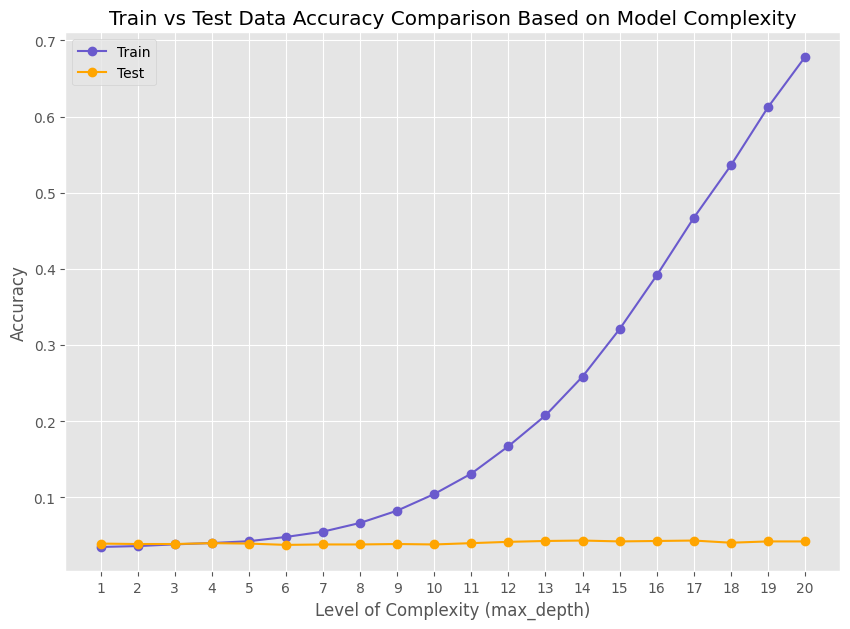

In [303]:
plt.figure(figsize=(10,7))
plt.plot(values, train_scores, '-o', label='Train', color='slateblue')
plt.plot(values, test_scores, '-o', label='Test', color='orange')

plt.title('Train vs Test Data Accuracy Comparison Based on Model Complexity')
plt.ylabel('Accuracy')
plt.xlabel('Level of Complexity (max_depth)')
plt.xticks(values)
plt.legend()